In [6]:
import PIL
import numpy as np
import torchvision
from PIL import Image as PILImage

import pyml

In [8]:
torchvision.datasets.Flowers102(root='datasets/flowers102', download=True)

Dataset Flowers102
    Number of datapoints: 1020
    Root location: datasets/flowers102
    split=train

In [9]:
flowers = torchvision.datasets.Flowers102(root='datasets/flowers102')
flowers

Dataset Flowers102
    Number of datapoints: 1020
    Root location: datasets/flowers102
    split=train

In [10]:
for i, img in zip(range(10), flowers):
    print(img)

(<PIL.Image.Image image mode=RGB size=754x500 at 0x7F462D35E950>, 0)
(<PIL.Image.Image image mode=RGB size=624x500 at 0x7F462D35E560>, 0)
(<PIL.Image.Image image mode=RGB size=667x500 at 0x7F462D35EA70>, 0)
(<PIL.Image.Image image mode=RGB size=750x500 at 0x7F462D35E650>, 0)
(<PIL.Image.Image image mode=RGB size=500x714 at 0x7F462D35EA40>, 0)
(<PIL.Image.Image image mode=RGB size=667x500 at 0x7F462D35E950>, 0)
(<PIL.Image.Image image mode=RGB size=750x500 at 0x7F462D35E560>, 0)
(<PIL.Image.Image image mode=RGB size=667x500 at 0x7F462D35EA70>, 0)
(<PIL.Image.Image image mode=RGB size=500x654 at 0x7F462D35E650>, 0)
(<PIL.Image.Image image mode=RGB size=578x500 at 0x7F462D35EA40>, 0)


In [11]:
saver = pyml.ImageSaver("datasets/flowers102processed")
for img, _ in flowers:
    img: PILImage = img
    img = PIL.ImageOps.exif_transpose(img)
    img = img.convert('RGB')
    if img.width < 256 or img.height < 256:
        continue

    h = img.height
    w = img.width

    if w > h:
        dx = (w - h) // 2
        img = img.crop(box=(dx, 0, dx+h, h))

    if h > w:
        dy = (h - w) // 2
        img = img.crop(box=(0, dy, w, dy + w))

    assert img.height == img.width
    img = img.resize(size=(256, 256))

    saver.savePIL(img)

In [12]:
dataset = pyml.ImagesDataset.from_dirs_recursive(roots=["datasets/flowers102processed"], shuffle_seed=12, channels_order='hwc')
dataset

MyImagesDataset(len = 1020)

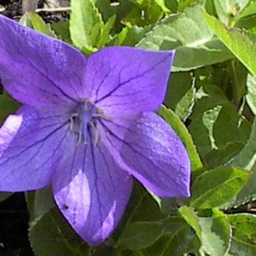

In [13]:
PILImage.fromarray((dataset[0] * 255.0).astype(np.uint8))

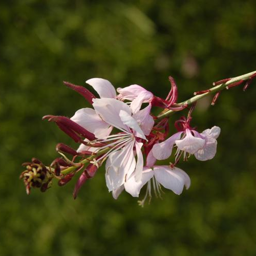

In [14]:
PILImage.fromarray((dataset[1] * 255.0).astype(np.uint8))